In [7]:
#install packages
install.packages(c("splitstackshape", "reshape2", "ecodist", "devtools", "ggbiplot", "vegan", "plyr"))
install_github("vqv/ggbiplot")

Warning message:
“package ‘ggbiplot’ is not available (for R version 3.3.2)”also installing the dependencies ‘memoise’, ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’, ‘permute’



In [14]:
#load packages
x = c("splitstackshape", "reshape2", "ecodist", "devtools", "ggbiplot", "vegan", "ggplot2", "dplyr", "plyr")
lapply(x, require, character.only = TRUE)

from URL https://api.github.com/repos/vqv/ggbiplot/zipball/master
Installing ggbiplot
'//anaconda/envs/py35/lib/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/gd/1vb2p2413f3_1xzqwhrhh0800000gn/T/RtmpP8iFjR/devtools55c735cd6a82/vqv-ggbiplot-7325e88'  \
  --library='/anaconda/envs/py35/lib/R/library' --install-tests 

Loading required package: ggbiplot
Loading required package: scales
Loading required package: grid


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

In [15]:
#Clean the data for NMDS and PCA analysis 

raw_abundance <- read.csv("~/RCode/culture_abundance.csv", header=TRUE)
data <- raw_abundance
data <- cSplit(data, 'ID', '|')
data <- plyr::rename(data, c("ID_1"="Kingdom", "ID_2"="Phylum", "ID_3"="Class", "ID_4"="Order","ID_5"="Family",
                             "ID_6"="Genius", "ID_7"="Species", "ID_8"="Strain"))
data <- data %>% select(Kingdom:Strain, everything())
class_data <- data %>% filter(Class != "NA") 
class_data <- class_data[is.na(class_data$Order),]
class_data <- select(class_data, Class, X1062_RE_50:X1295_BF_100)
class_data <- as.data.frame(t(class_data), stringsAsFactors = FALSE)
colnames(class_data) <- class_data[1,]  # the first row will be the header
class_data <- class_data[-1, ]
class_data$Sample_ID <- rownames(class_data)
class_data[,1:9] <- apply(class_data[,1:9], 2, FUN = as.numeric)
class_data$Rain <- ifelse(grepl("RE", class_data$Sample_ID, ignore.case = T), "Rain Event", 
                          ifelse(grepl("BF", class_data$Sample_ID, ignore.case = T), "Baseflow", "Others")) 
colnames(class_data) <- gsub("c__", "", colnames(class_data))

Square root transformation
Wisconsin double standardization
Run 0 stress 9.582933e-05 
Run 1 stress 9.964646e-05 
... Procrustes: rmse 0.0767056  max resid 0.1132135 
Run 2 stress 9.759244e-05 
... Procrustes: rmse 0.002785473  max resid 0.003943481 
... Similar to previous best
Run 3 stress 9.710092e-05 
... Procrustes: rmse 0.006450871  max resid 0.01214209 
Run 4 stress 0.1395252 
Run 5 stress 9.396695e-05 
... New best solution
... Procrustes: rmse 0.001646647  max resid 0.003379973 
... Similar to previous best
Run 6 stress 8.941327e-05 
... New best solution
... Procrustes: rmse 0.01210528  max resid 0.01764908 
Run 7 stress 9.600454e-05 
... Procrustes: rmse 0.002620006  max resid 0.003719011 
... Similar to previous best
Run 8 stress 9.992958e-05 
... Procrustes: rmse 0.009487466  max resid 0.01484361 
Run 9 stress 9.75892e-05 
... Procrustes: rmse 0.03761262  max resid 0.04888001 
Run 10 stress 0.0001265751 
... Procrustes: rmse 0.09540962  max resid 0.1301924 
Run 11 stress 0

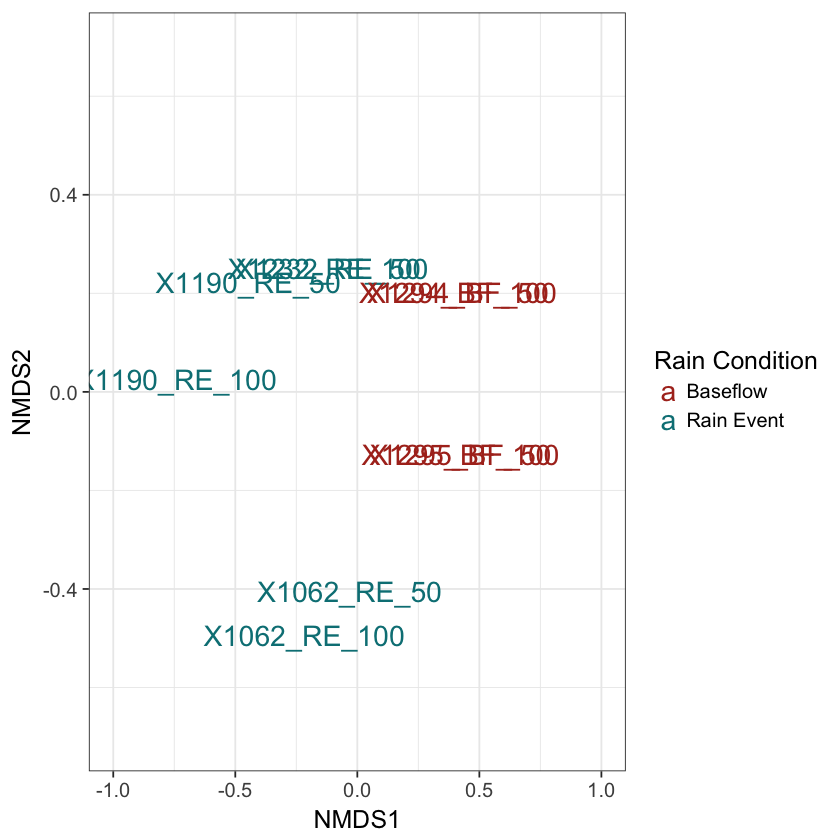

In [18]:
#nmds
class.mds <- metaMDS(class_data[,1:9]) 
data.scores <- as.data.frame(scores(class.mds))  #Using the scores function from vegan to extract the site scores and convert to a data.frame
data.scores$Rain <- class_data$Rain

#nmds_ggplot
ggplot(data.scores, aes(x=NMDS1,y=NMDS2, color = factor(Rain),label=rownames(data.scores))) + 
  geom_text(aes(colour = factor(Rain)), size=6) +
  scale_colour_discrete(name = "Rain Condition",l = 40) +
  ylim(-0.70,0.70) +
  xlim(-1.0,1.0) +
  theme(axis.text=element_text(size=11, color ="black"),
        axis.title.y=element_text(size=14,face="bold", vjust=1), 
        axis.title.x=element_text(size=14,face="bold", vjust=-0.1)) +
  theme_bw(base_size = 15) 

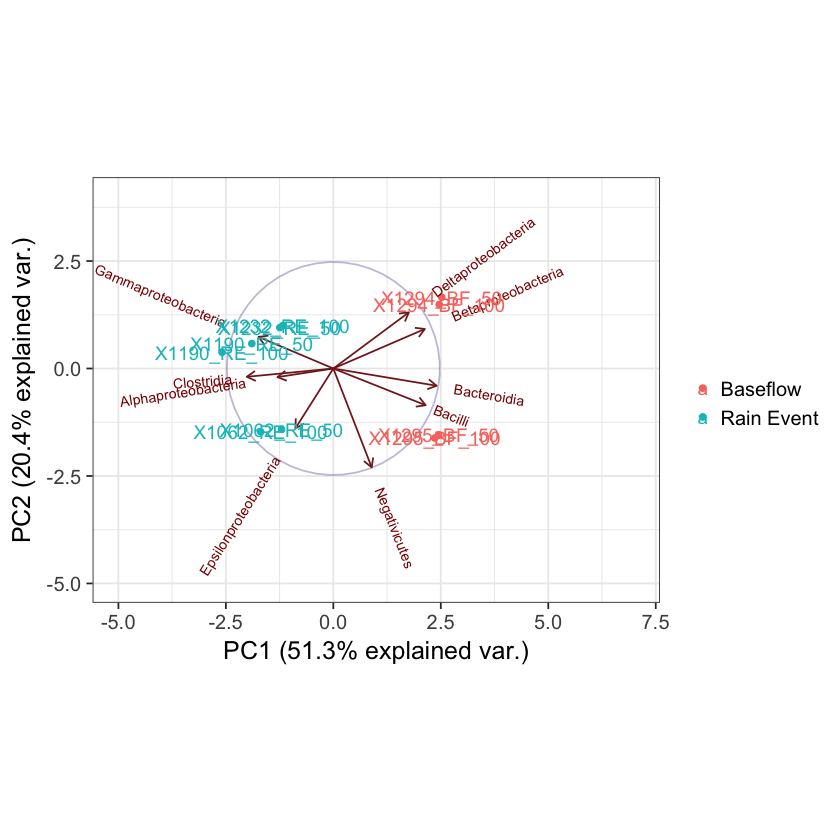

In [19]:
#PCA analysis and PCA plot 
class.pca <- prcomp(class_data[,1:9],
                    center = TRUE,
                    scale. = TRUE) 


ggbiplot(class.pca, obs.scale = 1, var.scale = 1, groups = class_data$Rain, ellipse = FALSE, 
         circle = TRUE, varname.size = 3) + 
  scale_color_discrete(name = "") + 
  theme(legend.direction = 'horizontal', legend.position = 'top') +
  geom_text(aes(label=rownames(class_data), colour = factor(class_data$Rain)),size=4) +
  ylim(-5,4) +
  xlim(-5,7) +
  theme(axis.text=element_text(size=11, color ="black"),
        axis.title.y=element_text(size=14,face="bold", vjust=1), 
        axis.title.x=element_text(size=14,face="bold", vjust=-0.1)) +
  theme_bw(base_size = 15) 

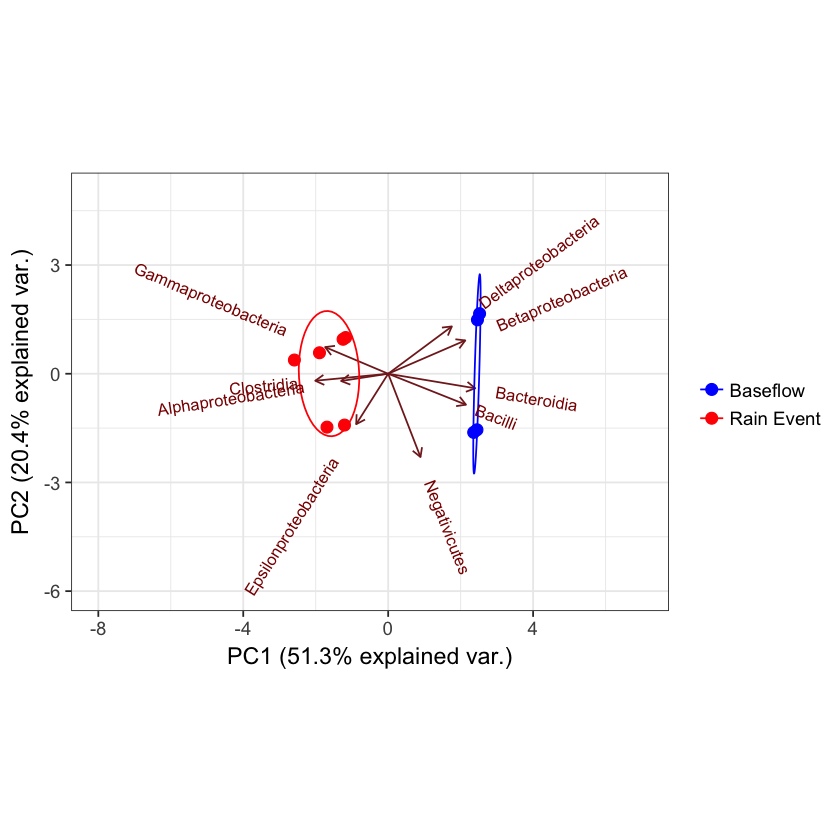

In [21]:
#Modify PCA plot to separate Baseflow and Rain Event on the plot

ggbiplot(class.pca, obs.scale = 1, var.scale = 1, groups = class_data$Rain, ellipse = TRUE, 
         circle = FALSE, varname.size = 3.5, varname.col = "black", labels.size = 10, labels.col="black") + 
  geom_point(aes(color=factor(class_data$Rain)), size=3) +
  scale_color_manual(values=c("blue", "red", "dark green"), name="") +
  theme(legend.direction = 'horizontal', legend.position = 'top') +
  ylim(-6,5) +
  xlim(-8,7) +
  theme(axis.text=element_text(size=10, color ="black"),
        axis.title.y=element_text(size=10,face="bold", vjust=1), 
        axis.title.x=element_text(size=10,face="bold", vjust=-0.1)) +
  theme_bw(base_size = 14)